In [ ]:
!pip install Pillow -U

     |████████████████████████████████| 3.0MB 6.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/DATASET/train2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2014/COCO_train2014_000000408557.jpg  
 extracting: train2014/COCO_train2014_000000013714.jpg  
 extracting: train2014/COCO_train2014_000000194043.jpg  
 extracting: train2014/COCO_train2014_000000219859.jpg  
 extracting: train2014/COCO_train2014_000000278135.jpg  
 extracting: train2014/COCO_train2014_000000141015.jpg  
 extracting: train2014/COCO_train2014_000000280923.jpg  
 extracting: train2014/COCO_train2014_000000200024.jpg  
 extracting: train2014/COCO_train2014_000000435713.jpg  
 extracting: train2014/COCO_train2014_000000249993.jpg  
 extracting: train2014/COCO_train2014_000000424160.jpg  
 extracting: train2014/COCO_train2014_000000142761.jpg  
 extracting: train2014/COCO_train2014_000000532668.jpg  
 extracting: train2014/COCO_train2014_000000564904.jpg  
 extracting: train2014/COCO_train2014_000000346384.jpg  
 extracting: train2014/COCO_train2014_000000560934.jpg  
 extracting: train2014/COCO_train2014

In [ ]:
%matplotlib inline

# download and unzip dataset o train
!wget http://images.cocodataset.org/zips/train2014.zip
!mkdir train
%cd /content/train
!unzip /content/train2014.zip
%cd ..

#download model
!wget https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
  
# download helper code
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/transformer.py
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/utils.py
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/vgg.py

# download style image  
# !wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/images/mosaic.jpg

--2021-06-20 04:40:06--  https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553451520 (528M) [application/x-tar]
Saving to: ‘vgg16-00b39a1b.pth’

vgg16-00b39a1b.pth  100%[===================>] 527.81M  10.6MB/s    in 49s     

2021-06-20 04:40:55 (10.9 MB/s) - ‘vgg16-00b39a1b.pth’ saved [553451520/553451520]

--2021-06-20 04:40:55--  https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/transformer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4660 (4.6K) [text/plain]
Saving to: ‘transformer.py’

transformer.py

In [ ]:
# !wget https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth

--2021-06-19 11:12:45--  https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553451520 (528M) [application/x-tar]
Saving to: ‘vgg16-00b39a1b.pth’

vgg16-00b39a1b.pth  100%[===================>] 527.81M  58.5MB/s    in 10s     

2021-06-19 11:12:56 (51.8 MB/s) - ‘vgg16-00b39a1b.pth’ saved [553451520/553451520]



In [ ]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import random
import numpy as np
import time
import vgg
import transformer
import utils  

In [ ]:
# Remove file
# path = '/content/train'
# x = os.listdir(path)
# os.removedirs('/content/train/.ipynb_checkpoints/')

['1']

In [ ]:
# GLOBAL SETTINGS
TRAIN_IMAGE_SIZE = 256
DATASET_PATH = "/content/train"
# DATASET_PATH = '/content/1'
NUM_EPOCHS = 1
STYLE_IMAGE_PATH = "/content/drive/MyDrive/NST/style/ocean.png"
BATCH_SIZE = 4 
CONTENT_WEIGHT = 17
STYLE_WEIGHT = 50
TV_WEIGHT = 1e-6 
ADAM_LR = 0.001
SAVE_MODEL_PATH = "/content/drive/MyDrive/temp/model/"
SAVE_IMAGE_PATH = "/content/drive/MyDrive/temp/image_result/"
SAVE_MODEL_EVERY = 500 # 2,000 Images with batch size 4
SEED = 35 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


========Epoch 1/2========
========Iteration 1/20696========
	Content Loss:	2917063.75
	Style Loss:	49328736.00
	Total Loss:	52245800.00
Time elapsed:	0.35810422897338867 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_0.pth


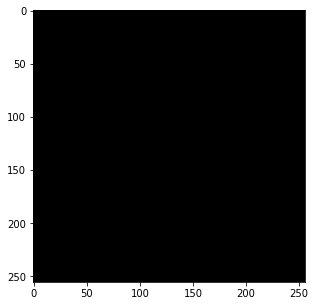

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_0.png
========Iteration 501/20696========
	Content Loss:	2594769.25
	Style Loss:	6874311.50
	Total Loss:	9469088.52
Time elapsed:	120.00137495994568 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_500.pth


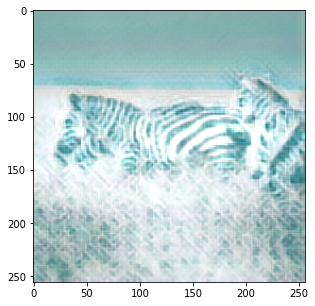

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_500.png
========Iteration 1001/20696========
	Content Loss:	2173687.75
	Style Loss:	3704988.75
	Total Loss:	5878681.35
Time elapsed:	245.04179048538208 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_1000.pth


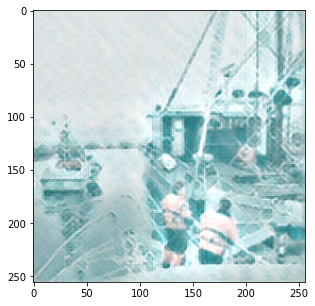

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_1000.png
========Iteration 1501/20696========
	Content Loss:	1938305.88
	Style Loss:	2616837.25
	Total Loss:	4555146.34
Time elapsed:	369.86033821105957 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_1500.pth


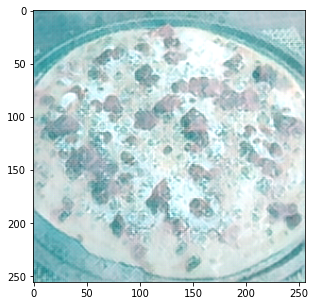

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_1500.png
========Iteration 2001/20696========
	Content Loss:	1783618.25
	Style Loss:	2067419.50
	Total Loss:	3851039.00
Time elapsed:	494.8951177597046 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_2000.pth


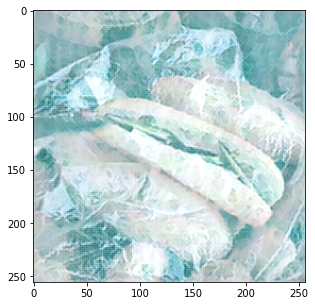

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_2000.png
========Iteration 2501/20696========
	Content Loss:	1674194.75
	Style Loss:	1732910.75
	Total Loss:	3407108.09
Time elapsed:	619.7134671211243 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_2500.pth


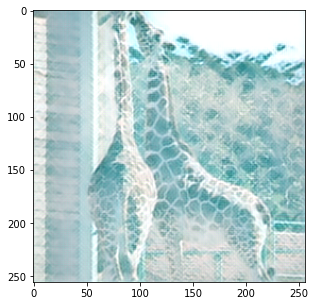

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_2500.png
========Iteration 3001/20696========
	Content Loss:	1596156.38
	Style Loss:	1508685.38
	Total Loss:	3104841.80
Time elapsed:	744.6294298171997 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_3000.pth


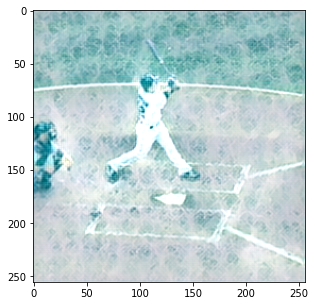

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_3000.png
========Iteration 3501/20696========
	Content Loss:	1536136.75
	Style Loss:	1346739.62
	Total Loss:	2882877.60
Time elapsed:	869.5328760147095 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_3500.pth


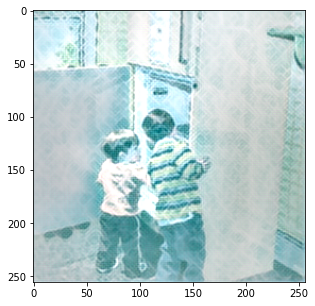

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_3500.png
========Iteration 4001/20696========
	Content Loss:	1485935.25
	Style Loss:	1223744.88
	Total Loss:	2709681.83
Time elapsed:	994.4861109256744 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_4000.pth


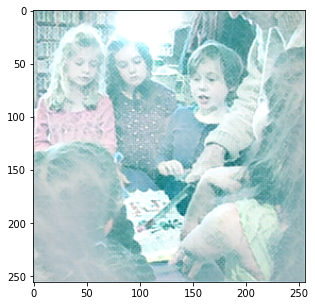

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_4000.png
========Iteration 4501/20696========
	Content Loss:	1446597.38
	Style Loss:	1127185.62
	Total Loss:	2573784.71
Time elapsed:	1119.5077493190765 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_4500.pth


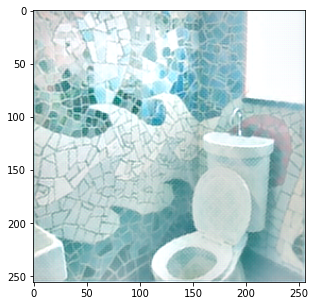

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_4500.png
========Iteration 5001/20696========
	Content Loss:	1413311.12
	Style Loss:	1049512.00
	Total Loss:	2462823.53
Time elapsed:	1244.3062326908112 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_5000.pth


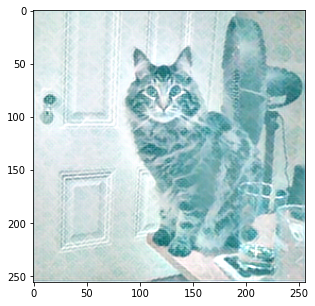

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_5000.png
========Iteration 5501/20696========
	Content Loss:	1384960.75
	Style Loss:	984988.06
	Total Loss:	2369948.08
Time elapsed:	1369.1755928993225 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_5500.pth


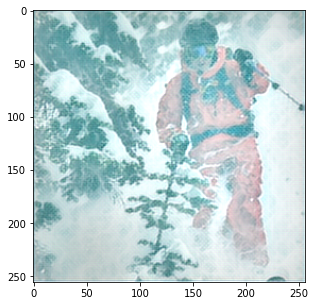

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_5500.png
========Iteration 6001/20696========
	Content Loss:	1360792.25
	Style Loss:	930998.88
	Total Loss:	2291791.34
Time elapsed:	1494.0034441947937 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_6000.pth


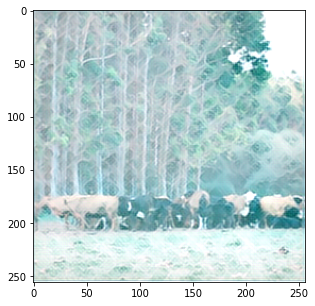

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_6000.png
========Iteration 6501/20696========
	Content Loss:	1340033.25
	Style Loss:	885222.19
	Total Loss:	2225254.85
Time elapsed:	1618.9592134952545 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_6500.pth


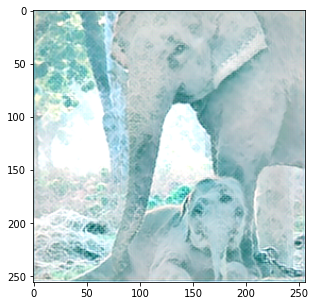

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_6500.png
========Iteration 7001/20696========
	Content Loss:	1321242.12
	Style Loss:	845579.19
	Total Loss:	2166820.25
Time elapsed:	1743.9535064697266 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_7000.pth


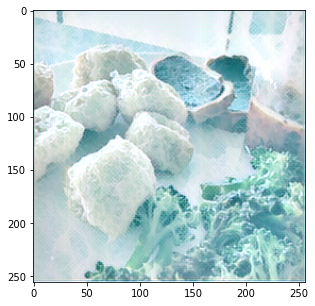

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_7000.png
========Iteration 7501/20696========
	Content Loss:	1304100.00
	Style Loss:	811005.56
	Total Loss:	2115106.05
Time elapsed:	1868.7766840457916 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_7500.pth


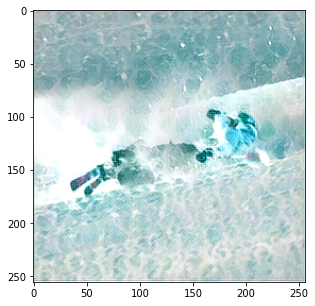

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_7500.png
========Iteration 8001/20696========
	Content Loss:	1289907.38
	Style Loss:	780712.00
	Total Loss:	2070619.77
Time elapsed:	1993.7238001823425 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_8000.pth


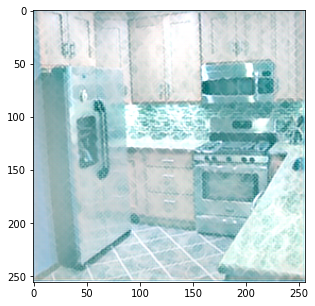

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_8000.png
========Iteration 8501/20696========
	Content Loss:	1277133.88
	Style Loss:	753576.94
	Total Loss:	2030710.58
Time elapsed:	2118.569479942322 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_8500.pth


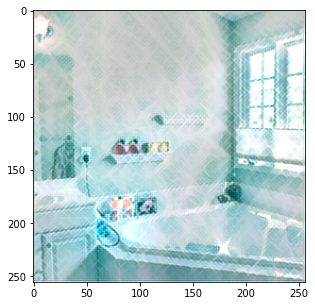

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_8500.png
========Iteration 9001/20696========
	Content Loss:	1266192.12
	Style Loss:	730322.81
	Total Loss:	1996516.33
Time elapsed:	2243.103086948395 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_9000.pth


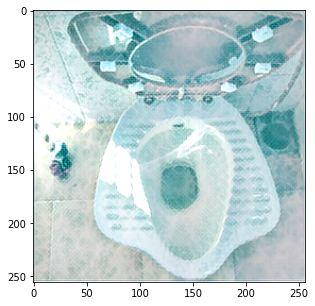

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_9000.png
========Iteration 9501/20696========
	Content Loss:	1255205.12
	Style Loss:	708712.25
	Total Loss:	1963919.59
Time elapsed:	2367.8533799648285 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_9500.pth


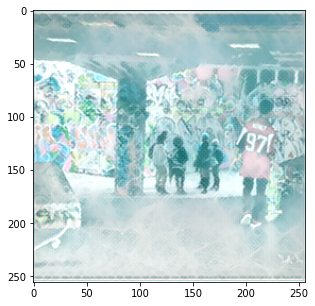

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_9500.png
========Iteration 10001/20696========
	Content Loss:	1245399.88
	Style Loss:	689067.25
	Total Loss:	1934469.13
Time elapsed:	2492.5127539634705 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_10000.pth


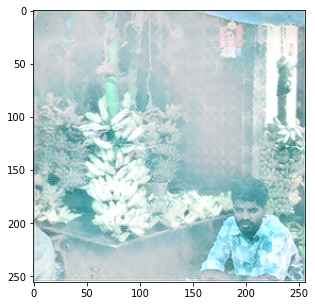

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_10000.png
========Iteration 10501/20696========
	Content Loss:	1236528.88
	Style Loss:	671050.81
	Total Loss:	1907581.34
Time elapsed:	2617.3140971660614 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_10500.pth


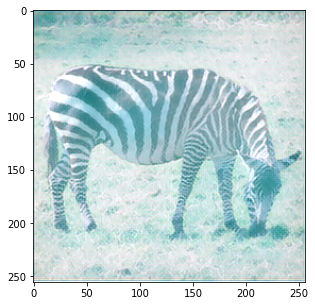

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_10500.png
========Iteration 11001/20696========
	Content Loss:	1228188.75
	Style Loss:	654727.50
	Total Loss:	1882917.83
Time elapsed:	2742.116393327713 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_11000.pth


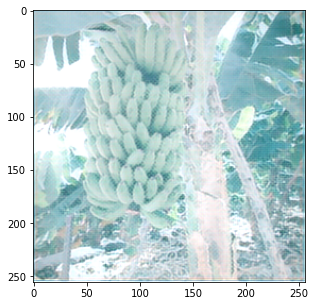

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_11000.png
========Iteration 11501/20696========
	Content Loss:	1221045.62
	Style Loss:	639783.19
	Total Loss:	1860828.99
Time elapsed:	2866.9188022613525 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_11500.pth


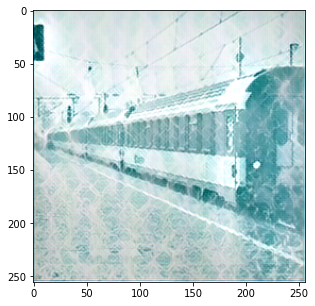

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_11500.png
========Iteration 12001/20696========
	Content Loss:	1214110.50
	Style Loss:	625887.56
	Total Loss:	1839998.78
Time elapsed:	2991.670362472534 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_12000.pth


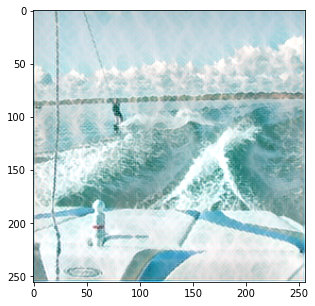

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_12000.png
========Iteration 12501/20696========
	Content Loss:	1207325.50
	Style Loss:	613055.62
	Total Loss:	1820380.95
Time elapsed:	3116.333212852478 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_12500.pth


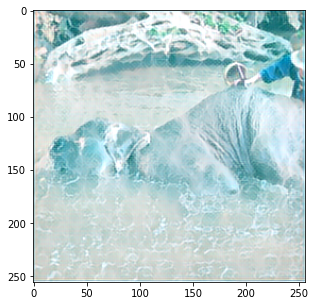

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_12500.png
========Iteration 13001/20696========
	Content Loss:	1201181.88
	Style Loss:	601142.06
	Total Loss:	1802323.89
Time elapsed:	3241.0701093673706 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_13000.pth


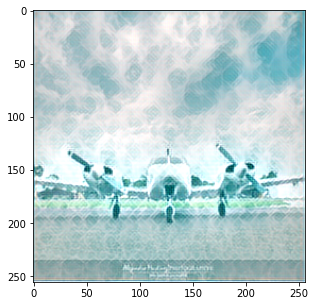

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_13000.png
========Iteration 13501/20696========
	Content Loss:	1195160.75
	Style Loss:	590056.38
	Total Loss:	1785217.35
Time elapsed:	3365.6918394565582 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_13500.pth


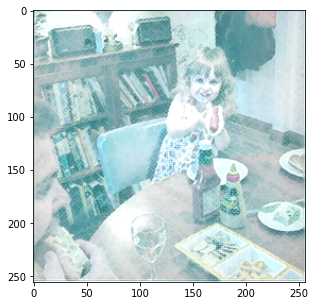

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_13500.png
========Iteration 14001/20696========
	Content Loss:	1189431.25
	Style Loss:	579757.12
	Total Loss:	1769188.72
Time elapsed:	3490.466220140457 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_14000.pth


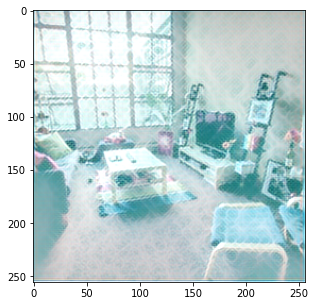

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_14000.png
========Iteration 14501/20696========
	Content Loss:	1184464.50
	Style Loss:	570179.12
	Total Loss:	1754643.61
Time elapsed:	3615.2075736522675 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_14500.pth


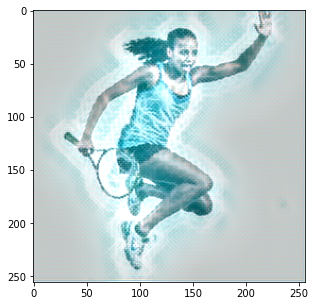

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_14500.png
========Iteration 15001/20696========
	Content Loss:	1180296.75
	Style Loss:	561284.12
	Total Loss:	1741580.63
Time elapsed:	3739.9320859909058 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_15000.pth


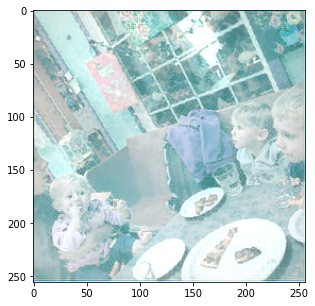

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_15000.png
========Iteration 15501/20696========
	Content Loss:	1175939.12
	Style Loss:	552831.81
	Total Loss:	1728771.60
Time elapsed:	3864.790854692459 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_15500.pth


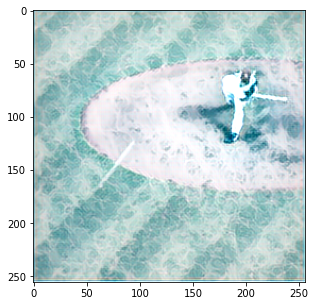

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_15500.png
========Iteration 16001/20696========
	Content Loss:	1172120.75
	Style Loss:	544882.50
	Total Loss:	1717003.93
Time elapsed:	3989.6434037685394 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_16000.pth


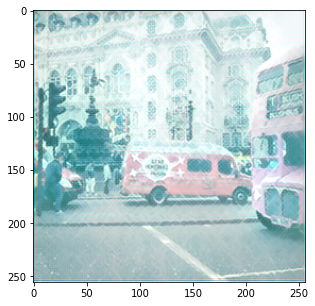

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_16000.png
========Iteration 16501/20696========
	Content Loss:	1167957.25
	Style Loss:	537362.56
	Total Loss:	1705320.49
Time elapsed:	4114.316213607788 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_16500.pth


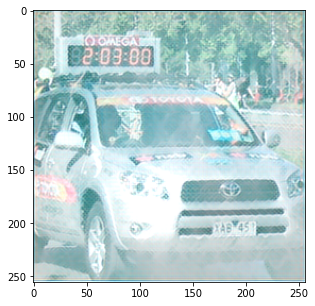

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_16500.png
========Iteration 17001/20696========
	Content Loss:	1164062.12
	Style Loss:	530238.69
	Total Loss:	1694300.47
Time elapsed:	4238.991002559662 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_17000.pth


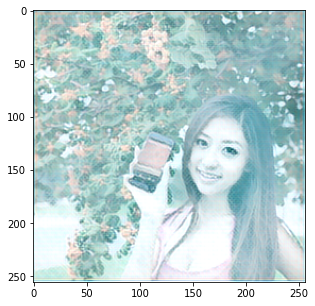

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_17000.png
========Iteration 17501/20696========
	Content Loss:	1160139.12
	Style Loss:	523463.34
	Total Loss:	1683600.52
Time elapsed:	4363.615841627121 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_17500.pth


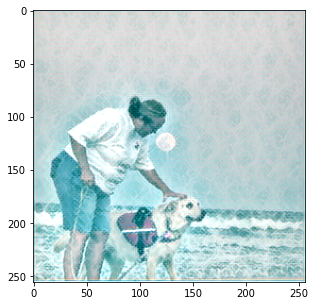

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_17500.png
========Iteration 18001/20696========
	Content Loss:	1156164.12
	Style Loss:	516995.22
	Total Loss:	1673156.63
Time elapsed:	4488.394003868103 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_18000.pth


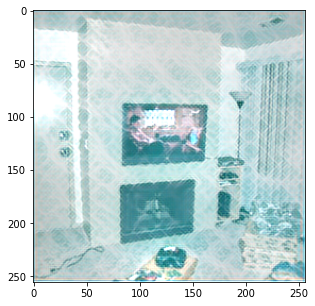

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_18000.png
========Iteration 18501/20696========
	Content Loss:	1152670.38
	Style Loss:	510949.31
	Total Loss:	1663617.16
Time elapsed:	4613.055199146271 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_18500.pth


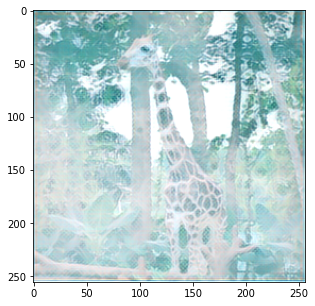

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_18500.png
========Iteration 19001/20696========
	Content Loss:	1149135.38
	Style Loss:	505084.66
	Total Loss:	1654217.83
Time elapsed:	4737.66540145874 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_19000.pth


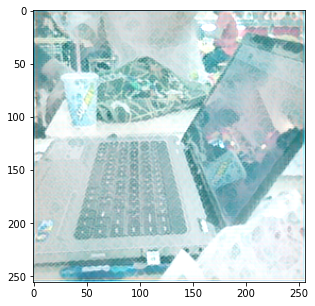

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_19000.png
========Iteration 19501/20696========
	Content Loss:	1145516.00
	Style Loss:	499481.44
	Total Loss:	1644994.53
Time elapsed:	4862.3282589912415 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_19500.pth


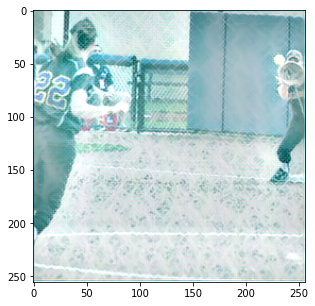

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_19500.png
========Iteration 20001/20696========
	Content Loss:	1142805.88
	Style Loss:	494327.75
	Total Loss:	1637130.94
Time elapsed:	4986.986174583435 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_20000.pth


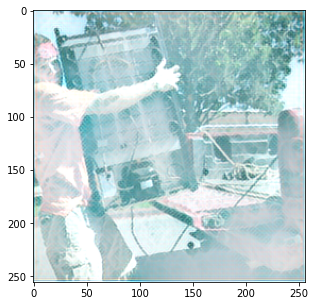

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_20000.png
========Iteration 20501/20696========
	Content Loss:	1140359.00
	Style Loss:	489399.12
	Total Loss:	1629756.23
Time elapsed:	5111.67729473114 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_20500.pth


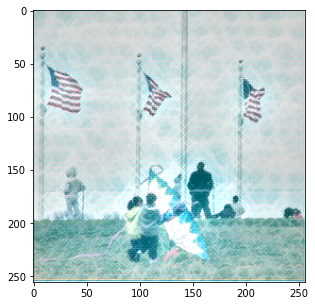

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_20500.png
========Iteration 20696/20696========
	Content Loss:	1139155.38
	Style Loss:	487502.22
	Total Loss:	1626655.60
Time elapsed:	5160.542744874954 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_20695.pth


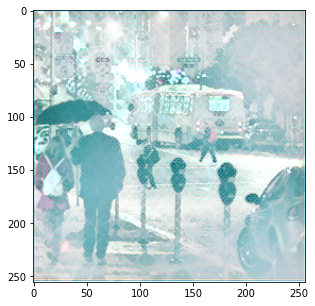

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_20695.png
Done Training the Transformer Network!
Training Time: 5160.794788360596 seconds
========Content Loss========
[52245800.0, 9469088.521956088, 5878681.353771228, 4555146.33610926, 3851038.995689655, 3407108.088614554, 3104841.801899367, 2882877.5998643246, 2709681.8290739814, 2573784.714591202, 2462823.527819436, 2369948.079326486, 2291791.3372771204, 2225254.8454468544, 2166820.2461969717, 2115106.0537261697, 2070619.7672790901, 2030710.5771012234, 1996516.3283524052, 1963919.5861817177, 1934469.1298182681, 1907581.3410568042, 1882917.8291518954, 1860828.9944189636, 1839998.7821848178, 1820380.95037397, 1802323.8872154064, 1785217.3512563885, 1769188.7224662525, 1754643.6074882767, 1741580.6304413038, 1728771.5982275337, 1717003.9343517593, 1705320.4861599298, 1694300.4702664549, 1683600.5240164849, 1673156.6304059497, 1663617.160889952, 1654217.8309529761, 1644994.5289312087, 1637130.9359344533,

In [ ]:
def train():
    # Seeds
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)

    # Device
    device = ("cuda" if torch.cuda.is_available() else "cpu")

    # Dataset and Dataloader
    transform = transforms.Compose([
        transforms.Resize(TRAIN_IMAGE_SIZE),
        transforms.CenterCrop(TRAIN_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
    train_dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Load networks
    TransformerNetwork = transformer.TransformerNetwork().to(device)
    VGG = vgg.VGG16('/content/vgg16-00b39a1b.pth').to(device)

    # Get Style Features
    imagenet_neg_mean = torch.tensor([-103.939, -116.779, -123.68], dtype=torch.float32).reshape(1,3,1,1).to(device)
    imagenet_mean = torch.tensor([103.939, 116.779, 123.68], dtype=torch.float32).reshape(1,3,1,1).to(device)
    style_image = utils.load_image(STYLE_IMAGE_PATH)
    style_tensor = utils.itot(style_image).to(device)
    style_tensor = style_tensor.add(imagenet_neg_mean)
    B, C, H, W = style_tensor.shape
    style_features = VGG(style_tensor.expand([BATCH_SIZE, C, H, W]))
    style_gram = {}
    for key, value in style_features.items():
        style_gram[key] = utils.gram(value)

    # Optimizer settings
    optimizer = optim.Adam(TransformerNetwork.parameters(), lr=ADAM_LR)

    # Loss trackers
    content_loss_history = []
    style_loss_history = []
    total_loss_history = []
    batch_content_loss_sum = 0
    batch_style_loss_sum = 0
    batch_total_loss_sum = 0

    # Optimization/Training Loop
    batch_count = 1
    start_time = time.time()
    for epoch in range (1, NUM_EPOCHS+1):
        print("========Epoch {}/{}========".format(epoch, NUM_EPOCHS+1))
        for batch_id, (content_batch, _) in enumerate(train_loader):
            # Current Batch size in case of odd batches
            curr_batch_size = content_batch.shape[0]
            
            # Zero-out Gradients
            optimizer.zero_grad()

            # Generate images and get features
            content_batch = content_batch[:,[2,1,0]].to(device)
            generated_batch = TransformerNetwork(content_batch)
            content_features = VGG(content_batch.add(imagenet_neg_mean))
            generated_features = VGG(generated_batch.add(imagenet_neg_mean))

            # Content Loss
            MSELoss = nn.MSELoss().to(device)
            content_loss = CONTENT_WEIGHT * MSELoss(content_features['relu2_2'], generated_features['relu2_2'])            
            batch_content_loss_sum += content_loss

            # Style Loss
            style_loss = 0
            for key, value in generated_features.items():
                s_loss = MSELoss(utils.gram(value), style_gram[key][:curr_batch_size])
                style_loss += s_loss
            style_loss *= STYLE_WEIGHT
            batch_style_loss_sum += style_loss

            # Total Loss
            total_loss = content_loss + style_loss
            batch_total_loss_sum += total_loss.item()

            # Backprop and Weight Update
            total_loss.backward()
            optimizer.step()

            # Save Model and Print Losses
            if (((batch_count-1)%SAVE_MODEL_EVERY == 0) or (batch_count==NUM_EPOCHS*len(train_loader))):
                # Print Losses
                print("========Iteration {}/{}========".format(batch_count, NUM_EPOCHS*len(train_loader)))
                print("\tContent Loss:\t{:.2f}".format(batch_content_loss_sum/batch_count))
                print("\tStyle Loss:\t{:.2f}".format(batch_style_loss_sum/batch_count))
                print("\tTotal Loss:\t{:.2f}".format(batch_total_loss_sum/batch_count))
                print("Time elapsed:\t{} seconds".format(time.time()-start_time))

                # Save Model
                checkpoint_path = SAVE_MODEL_PATH + "checkpoint_" + str(batch_count-1) + ".pth"
                torch.save(TransformerNetwork.state_dict(), checkpoint_path)
                print("Saved TransformerNetwork checkpoint file at {}".format(checkpoint_path))

                # Save sample generated image
                sample_tensor = generated_batch[0].clone().detach().unsqueeze(dim=0)
                sample_image = utils.ttoi(sample_tensor.clone().detach())
                sample_image_path = SAVE_IMAGE_PATH + "sample0_" + str(batch_count-1) + ".png"
                utils.saveimg(sample_image, sample_image_path)
                utils.show(sample_image)
                print("Saved sample tranformed image at {}".format(sample_image_path))

                # Save loss histories
                content_loss_history.append(batch_total_loss_sum/batch_count)
                style_loss_history.append(batch_style_loss_sum/batch_count)
                total_loss_history.append(batch_total_loss_sum/batch_count)

            # Iterate Batch Counter
            batch_count+=1

    stop_time = time.time()
    # Print loss histories
    print("Done Training the Transformer Network!")
    print("Training Time: {} seconds".format(stop_time-start_time))
    print("========Content Loss========")
    print(content_loss_history) 
    print("========Style Loss========")
    print(style_loss_history) 
    print("========Total Loss========")
    print(total_loss_history) 

    # Save TransformerNetwork weights
    TransformerNetwork.eval()
    TransformerNetwork.cpu()
    final_path = SAVE_MODEL_PATH + "transformer_weight.pth"
    print("Saving TransformerNetwork weights at {}".format(final_path))
    torch.save(TransformerNetwork.state_dict(), final_path)
    print("Done saving final model")

train()